# Two Sum (two solutions)

*Michael Snowden*, 24 January 2024

This simple [algorithmic essay](https://dsa-ou.github.io/algoesup/) aims to solve the classic [Two Sum](https://leetcode.com/problems/two-sum/) problem from [LeetCode](https://leetcode.com/). 

Readers should have an intermediate understanding of [Python](https://docs.python.org/3/tutorial/index.html) to understand this
essay.

## 1 Problem

Given an array of integers `nums` and an integer `target`, return indices of
the two numbers such that they add up to `target`.

 - $-109 \leq$ `nums[i]` $\leq 109$
 - $-109 \leq$ `target` $\leq 109$
 - Only one valid answer exists.

## 2 Algorithms

With our problem defined, the next step is to think of ways to solve it. This
section presents two approaches to solving Two Sum: brute force, and mapping.

### 2.1 Brute force

Generally speaking, a brute force algorithm tries all possibilities, and
selects a correct one. For this problem, the possibilities are all sums that
can be obtained by pairing each number in `nums` with every other number, and
the correct pair is selected when the sum matches `target`.

>**Brute force algorithm**: An outer loop iterates through each number in
>`nums`, then for each number, an inner loop iterates `nums` again. For each
>pair of numbers, if their indices are different and their sum matches `target`,
>return their indices.

### 2.2 Mapping

In the **Brute force algorithm**, we checked each pair of numbers in `nums` to see
if the resulting sum was equal to `target`. Since we are already checking every
number in the list, why not store some piece information from each number that
will help us find our matching pair?

For every number in `nums`, we can map the difference between it and the target
(`target` - number) to its corresponding index using a hashtable. This allows
us to check the hashtable for matching numbers much faster.

>**Mapping algorithm**: For each number in `nums`, if its in the hashmap, return
>its index and the index mapped to it. Otherwise, calculate the difference
>(`target` - number) and map it to the corresponding index of number.

## 3 Code

In this section we will implement and test the algorithms.

In [1]:
from algoesup import test, time_functions, time_cases

%ruff on
%allowed on

ruff was activated
allowed was activated


### 3.1 Testing

We start off by writing some tests.

To test the above solutions, we need to consider edge cases and other important
functional tests. We should include tests for the minimum input size, and any
extremes values that can be present. When integers are part of the input, and
there are no restrictions, negative numbers and zero should be added to the
tests.

In [2]:
two_sum_tests = [
  # ["description", nums, target, expected_output],
    ["minimum size for nums", [1, 2], 3, (0, 1)],
    ["non-adjacent indices", [1, 4, 9, 7], 8, (0, 3)],
    ["first two elements", [5, 7, 1, 2, 8], 12, (0, 1)],
    ["last two elements", [1, 3, 5, 7, 8], 15, (3, 4)],
    ["repeated elements", [6, 2, 3, 2], 4, (1, 3)],
    ["max and min range", [-109, 109, 0], 0, (0, 1)],
    ["lowest target value", [-50, 1, -59], -109, (0, 2)],
    ["highest target value", [50, 1, 59], 109, (0, 2)],
]

### 3.2 Implementations

The next cell implements the **Brute force algorithm** using nested `for` loops

In [3]:
def two_sum_bf(nums, target):
    """Given a list of integers return the indices of the pair that sums to target."""
    for index_1 in range(len(nums)):
        for index_2 in range(len(nums)):
            if index_1 != index_2 and nums[index_1] + nums[index_2] == target:
                return index_1, index_2

test(two_sum_bf, two_sum_tests)

Testing two_sum_bf:
Tests finished.


Next up is the **Mapping algorithm** implemented using Python's `dict`.

In [4]:
def two_sum_map(nums, target):
    """Given a list of integers return the indices of the pair that sums to target."""
    differences = {}
    for index in range(len(nums)):
        difference = target - nums[index]
        if nums[index] in differences:
            return differences[nums[index]], index
        differences[difference] = index

test(two_sum_map, two_sum_tests)

Testing two_sum_map:
Tests finished.


## 4 Performance

In this section we measure the run-times of our solutions under certain 
conditions and discuss the results.


### 4.1 Generating inputs

Since `time_functions` from the `algoesup` library requires code to generate
inputs, we shall write that first.

It is often useful to measure the run-times of a solution when it is doing the
*most* work; this is called the worst-case. We want to generate inputs
that will take our solution the most time to complete, and this happens when
the two numbers that sum to `target` are the last two.

In [1]:
def worst(size):
    """Given a size, generate a worst-case problem instance for two sum."""
    nums = [0] * (size - 2) + [1, 1]
    target = 2
    return (nums, target)

### 4.2 Run-times for each solution

We now compare worst-case runtimes for both solutions. The input has an initial
size of 100, and is doubled 4 times; the run times are measured for the initial
size, then each time it is doubled.

Inputs generated by worst

Input size      two_sum_bf     two_sum_map 
       100           587.6             7.5 µs
       200          2335.2            14.8 µs
       400          9829.8            31.0 µs
       800         41044.9            63.8 µs
      1600        168881.4           128.3 µs

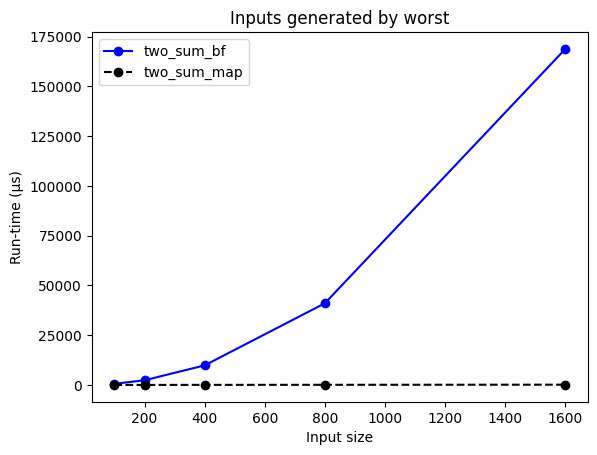

In [6]:
solutions = [two_sum_bf, two_sum_map]
time_functions(solutions, worst, start=100, double=4, chart=True)

The numbers printed before the chart represent the run-times of our solutions
in microseconds (µs) for increasing input sizes. For an input size of 1600
`two_sum_bf` takes approximately 174090 microseconds and `two_sum_map` takes
130 microseconds.

On the chart, the data points for `two_sum_bf` almost instantly eclipse that of
`two_sum_map`. It looks as if the run-times for `two_sum_map` are not growing
at all, but we know by looking at numbers above that this is not the case. 

Let us see if we can modify the inputs of `time_functions` for a better visual
representation.

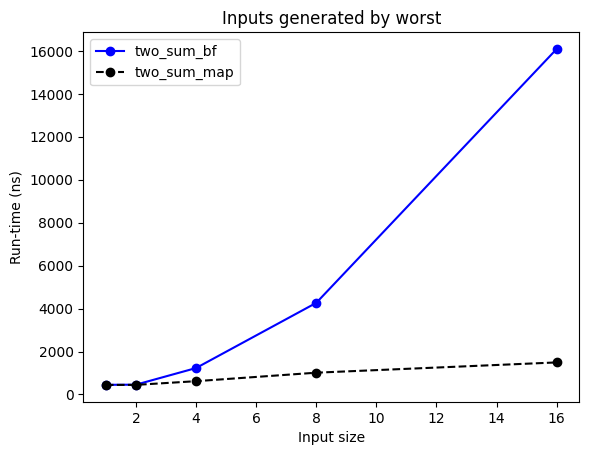

In [7]:
solutions = [two_sum_bf, two_sum_map]
time_functions(solutions, worst, start=1, double=4, text=False, chart=True)

We changed the initial input size to 1, and the trend of the run-times is a little
clearer now. The **Brute force algorithm's** run-time's still accelerate off
into the stratosphere, but we can see the separation and trend of the **Mapping
algorithm** a little better.

## 5 Conclusion

We started this essay with the definition of the Two Sum problem. Next, we
outlined two algorithms: brute force, and mapping . After that, we implemented
and tested our solutions using Python, and in the penultimate section we used
empirical testing and discussed the results. Now we must decide which of our
algorithms is best.

The **Brute force algorithm** is not very efficient when it comes to run-times.
When the size of the input increases the run-times increase by a large
amount. The one redeeming aspect of this algorithm is the efficient memory usage
which is achieved by *not* using any additional data structures like
dictionaries.

In contrast, the **Mapping algorithm** is reasonably efficient in terms of run
times, but this is achieved by using extra memory in the form of the
dictionary. In the final analysis, the slow run-times of the brute force
algorithm cannot be ignored. The small trade of memory for faster run-times is
worth it in this instance. We therefore conclude the mapping algorithm is best.